 # Identificación estructural preliminar de quitinasas fúngicas de  biocontroladores con diferentes nichos ecológicos. 
                               
                               
                               Cristian David Grisales Vargas c.c:1152208435

# Introducción

En la agricultura se ha visto a lo largo de los años el empleo de nuevas estrategias para el mantenimiento de su materia prima, como en la implementación de químicos para mitigar sus principales problemas, plagas y enfermedades (Arango 2011). Pero debido a su uso excesivo y prolongado, se han evidenciado implicaciones negativas en varios ámbitos (Travisi y Nijkamp 2008). Esto generó alternativas como la implementación de los programas de manejo integrado de plagas (MIPE) y el cambio hacia una agricultura sostenible con productos naturales (Arango 2011).  De este nuevo giro, surgen el empleo de agentes biológicos para el control de estas problemáticas, destacándose géneros de hongos biocontroladores: Trichoderma spp., Beauveria spp., Paecilomyces spp., Metarrhizium spp. y Purpureocillium spp (Arango 2011, Nicholls 2008). No obstante, estos hongos tienden a ser específicos conforme a su huésped, es decir, algunos son entomopatógenos exclusivamente como Metarrhizium spp, y otros como Purpureocillium spp, presentan una ampliación de su nicho ecológico, nemátodos,miriápodos,insectos e incluso humanos inmunocomprometidos (Arango 2011, Janisiewicz 1996, Luangsa-ard et al. 2011, Nicholls 2008, Petrelli et al. 2003, Wang et al. 2016). El nicho de ecológico de un entomopatógeno se define como el huésped que parasita y para el posterior establecimiento del patógeno, influyen una gran cantidad de factores como: la maquinaria enzimática bidireccional, las barreras físicas, los mecanismos evasivos del sistema inmune en el hospedero, la capacidad de dispersión del patógeno, etc (Araújo et al. 2016, Eisenhauer et al. 2013, Cory y Ericcson 2009, Tarasco et al. 2011, Wang et al. 2016).

Actualmente se han identificado varias proteínas implicadas en la patogenicidad de biocontroladores especialistas como M. acridum y/o generalistas como P. lilacinum , dentro de las cuales están quitinasas, proteasas de serina y subtilisinas, elicitinas, fosfolipasas, citocromo P450, entre otras (Gao et al. 2011, Li et al. 2010, Mantilla et al. 2012, Sanchez-Gutiérrez 2017, Prasad et al. 2015, Wang et al. 2016, Xiao et al. 2012, Xie et al. 2016).  Sin embargo, a pesar de haber sido elucidado su papel en la patogénesis, proteínas como las quitinasas, también son fundamentales en el remodelamiento y degradación de la pared celular de los hongos (Bolar et al. 2001, Hartl et al. 2012). Adicionalmente, se ha observado en la cepa nematófaga P. lilacinum 36-1, presenta expansiones en los genes relacionados con la degradación de quitina, como quitinasas, quitosanasas y deacetilasas y esto posiblemente indica la versatilidad de este hongo frente a la infección en los diferentes estadios de nemátodos y/o de su rango de hospedadores (Gao et al. 2011). Por lo tanto, es necesario realizar una identificación estructural y molecular preliminar de las quitinasas comunes entre dos biocontroladores con diferentes nichos ecológicos, P.lilacinum y M.acridum, con el fin de proveer mayor información acerca de diferencias  en sus secuencias y/o plegamientos y así,  obtener un mejor entendimiento de sus limitaciones con respecto al rango de hospederos.

# Métodos

En primer lugar, se buscarán proteínas de tipo quitinasas comunes entre los biocontroladores Purpureocillium lilacinum y Metarhizium acridum, en la enciclopedia de genes y genomas KEGG(Kanehisa y Goto 2000). Al cabo de seleccionarlas, se obtendrá información adicional en esta misma base de datos con respecto a su metabolismo y a sus respectivas secuencias de aminoácidos para los posteriores alineamientos.(Kanehisa y Goto 2000)

En segundo lugar, se realizarán alineamientos globales con matrices de sustitución BlOSUM62 y PAM60, empleando la herramienta Pairwise2 de Biopython (Chapman y Chang 2000, Mount et al. 2014). Se eligieron estas matrices debido a que sus resultados pueden elucidar presencia de regiones conservadas entre cada par de proteína (Mount et al. 2014) y su relación con la amplitud de sus nichos ecológicos. Los parámetros para gap_penalty y gap_extension serán de -10 y -0.5 respectivamente , con el fin de obtener los mejores alineamientos. Estos serán realizados entre las secuencias de aminoácidos de cada par de quitinasas comunes de los biocontroladores.

Por último, se llevarán a cabo predicciones de los plegamientos de cada proteína con el programa SWISS-MODEL (Waterhouse et al. 2018), con el fin de corroborar sí dichas diferencias en los alineamientos, presentan repercusiones en la estructuras terciaras proteicas. 

# Resultados 

Antes de comenzar el flujo de trabajo, necesitaremos algunas librerias como las siguientes:

In [1]:
import Bio

In [2]:
from Bio import SeqIO,Align,pairwise2
from Bio.SubsMat.MatrixInfo import blosum62,pam60 
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral
import IPython.display
from IPython.display import Image, HTML
import random
def PDF(filename):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % filename)

A continuación obtenemos la información de la enciclopedia de genes y genomas (KEGG) para P.lilacinum y M.acridum:

In [3]:
print(kegg_info("plj").read()+'\n'+kegg_info('maw').read())

T05029           Purpureocillium lilacinum KEGG Genes Database
plj              Release 88.0+/11-19, Nov 18
                 Kanehisa Laboratories
                 11,763 entries

linked db        pathway
                 brite
                 module
                 ko
                 genome
                 enzyme
                 ncbi-geneid
                 ncbi-proteinid
                 uniprot

T03104           Metarhizium acridum KEGG Genes Database
maw              Release 88.0+/11-19, Nov 18
                 Kanehisa Laboratories
                 9,849 entries

linked db        pathway
                 brite
                 module
                 ko
                 genome
                 enzyme
                 ncbi-geneid
                 ncbi-proteinid
                 uniprot



Luego, obtenemos únicamente los códigos de acceso para las quitinasas  de cada biocontrolador:

In [4]:
print('PARA PURPUREOCILLIUM LILACINUM'+'\n'+kegg_find('plj','chitinase').read()+'\n'+'PARA METARHIZIUM ACRIDUM'+'\n'+kegg_find('maw', 'chitinase').read()) 

PARA PURPUREOCILLIUM LILACINUM
plj:VFPFJ_00665	chitinase 18-4
plj:VFPFJ_01252	chitinase 18-11
plj:VFPFJ_01715	chitinase
plj:VFPFJ_02071	glycoside hydrolase family 18
plj:VFPFJ_03535	endochitinase
plj:VFPFJ_04423	chitinase 3 precursor
plj:VFPFJ_04722	chitinase
plj:VFPFJ_05136	glycoside hydrolase family 18, chitinase
plj:VFPFJ_05987	chitinase 1 precursor
plj:VFPFJ_06223	class III chitinase ChiA2
plj:VFPFJ_06652	endochitinase
plj:VFPFJ_07410	class III chitinase
plj:VFPFJ_07608	glycoside hydrolase family 18, chitinase
plj:VFPFJ_07624	chitinase
plj:VFPFJ_08129	oviduct-specific glyco protein
plj:VFPFJ_08231	glycoside hydrolase, chitinase active site protein
plj:VFPFJ_08566	endochitinase CHI3
plj:VFPFJ_08821	chitinase 1 precursor
plj:VFPFJ_08862	class III chitinase
plj:VFPFJ_09011	chitinase
plj:VFPFJ_10438	endochitinase
plj:VFPFJ_11028	endochitinase CHI3
plj:VFPFJ_11102	endochitinase
plj:VFPFJ_11179	chitinase 1 precursor
plj:VFPFJ_11335	bacteriodes thetaiotaomicron symbiotic chitinase
plj:VFP

De igual manera,un diagrama con información adicional acerca del metabolismo de la quitina en estos
agentes biocontroladores:

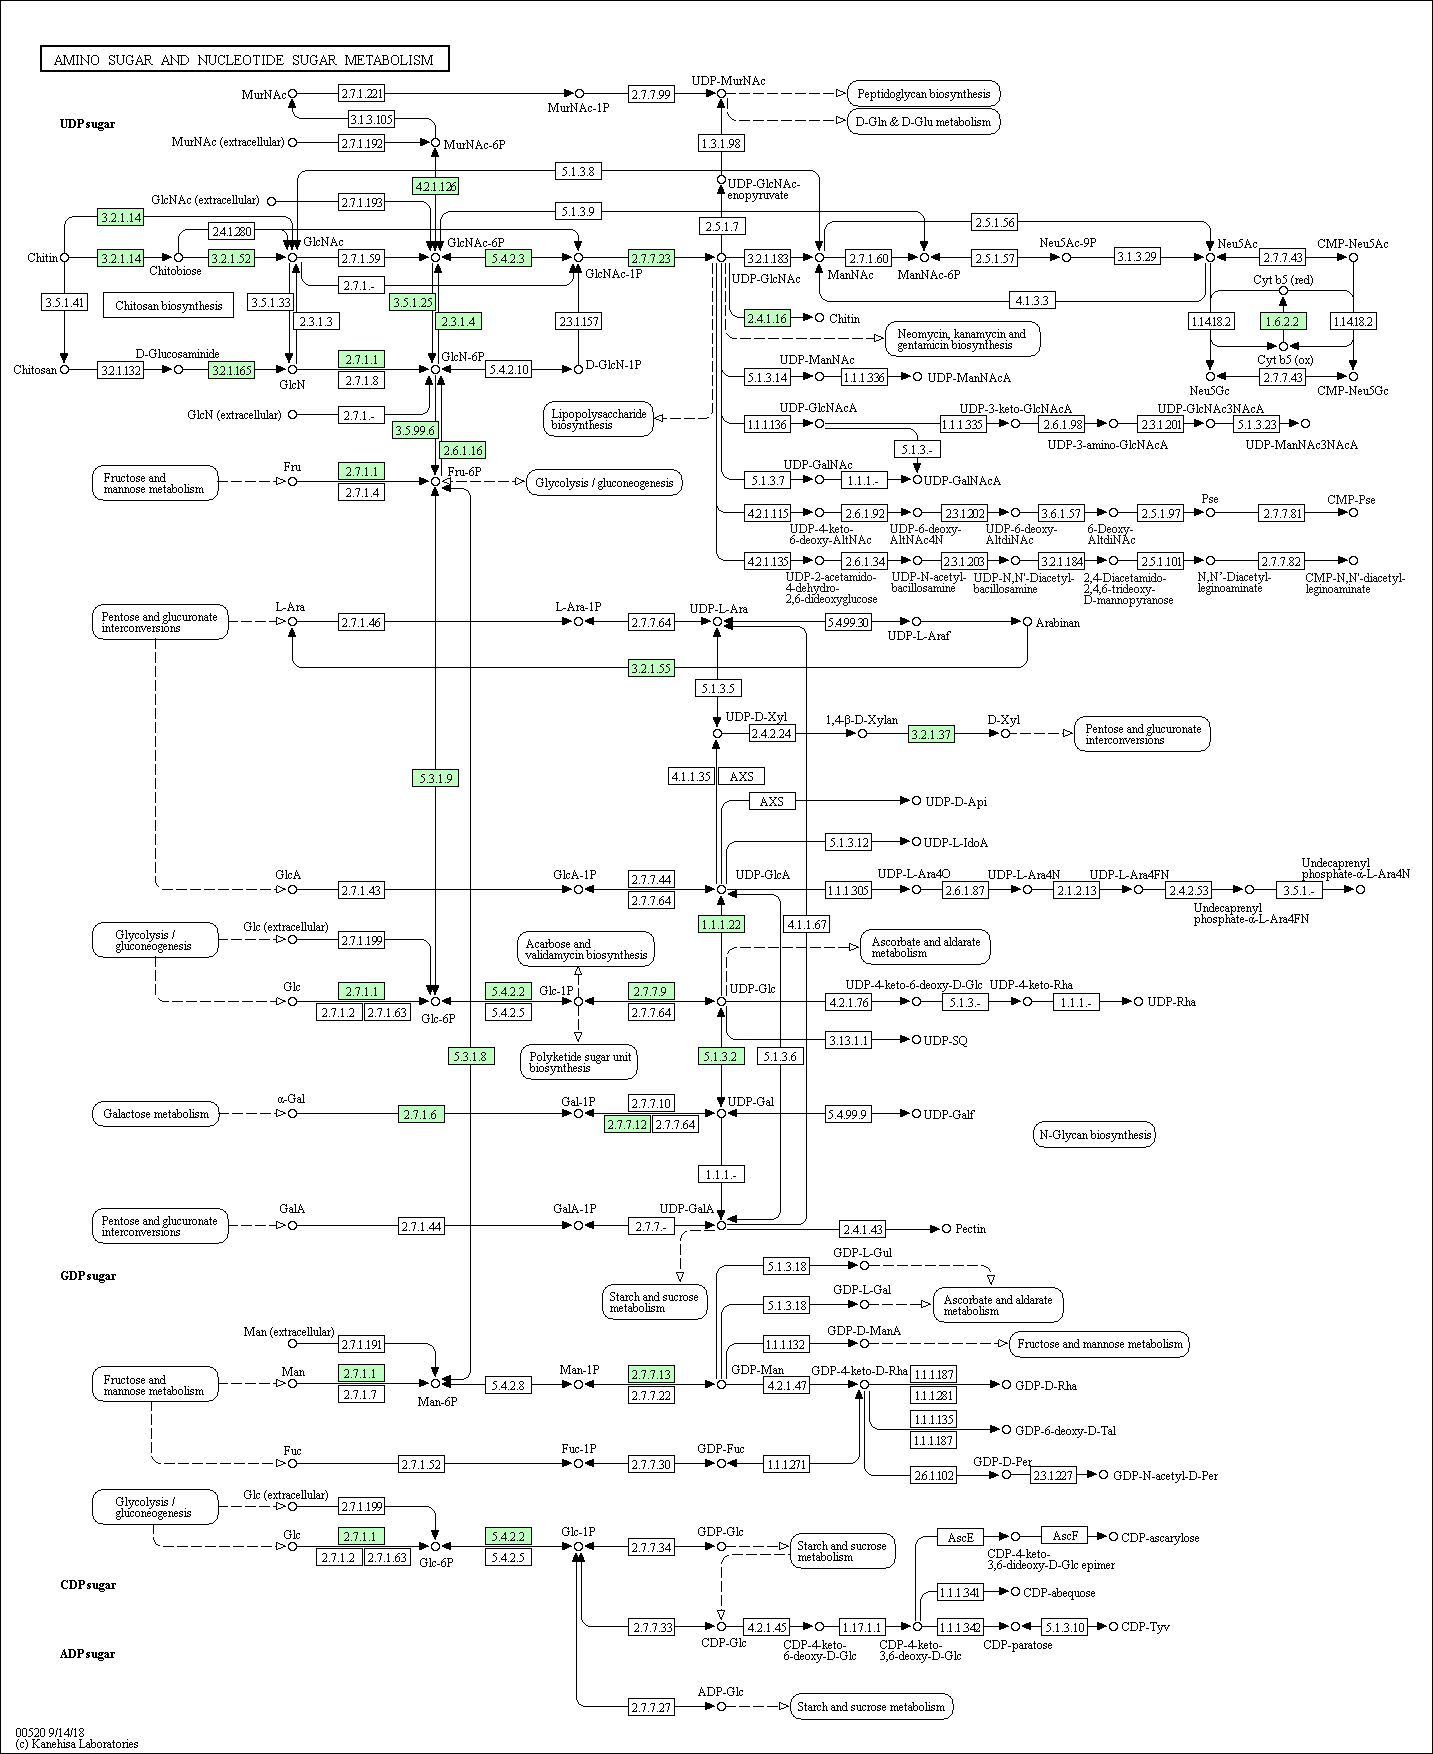

In [5]:
Image(kegg_get("plj00520", "image").read())

Después de adquirir los códigos de acceso, se procede a conseguir las secuencias de aminoácidos para cada par de proteina evaluada en P.lilacinum y M.acridum:
Las quitinasas y los códigos de acceso respectivos se encuentran a continuación:

Código: plj:VFPFJ_00665 Nombre: Chitinase 18-4 

Código: maw:MAC_02367   Nombre: Chitinase 18-4

Código: plj:VFPFJ_01252 Nombre: Chitinase 18-11 

Código: maw:MAC_02533   Nombre: Chitinase 18-11

Código: plj:VFPFJ_03535 Nombre: Endochitinase

Código: maw:MAC_04952   Nombre: Endochitinase

Código: plj:VFPFJ_06223 Nombre: Chitinase Class III ChiA2

Código: maw:MAC_02195   Nombre: Chitinase Class III ChiA2

Código: plj:VFPFJ_11337 Nombre: Chitinase 18-18

Código: maw:MAC_04884   Nombre: Chitinase 18-18

In [6]:
print('Chitinase 18-4-P. lilacinum'+'\n'+kegg_get("plj:VFPFJ_00665", "aaseq").read()+'\n'+'Chitinase 18-4-M. acridum'+'\n'+kegg_get("maw:MAC_02367", "aaseq").read()+'\n\n'
     +'Chitinase 18-11-P. lilacinum'+'\n'+kegg_get("plj:VFPFJ_01252", "aaseq").read()+'\n'+'Chitinase 18-11-M. acridum'+'\n'+kegg_get("maw:MAC_02533", "aaseq").read()+'\n\n'
     +'Endoquitinase-P. lilacinum'+'\n'+kegg_get("plj:VFPFJ_03535", "aaseq").read()+'\n'+'Endochitinase-M. acridum'+'\n'+kegg_get("maw:MAC_04952", "aaseq").read()+'\n\n'
     +'Class III chitinase ChiA2-P. lilacinum'+'\n'+kegg_get("plj:VFPFJ_06223", "aaseq").read()+'\n'+'Class III chitinase ChiA2-M. acridum'+'\n'+kegg_get("maw:MAC_02195", "aaseq").read()+ '\n\n'+
     'Chitinase 18-18-P. lilacinum'+'\n'+kegg_get("plj:VFPFJ_11337", "aaseq").read()+'\n'+'Chitinase 18-18-M. acridum'+'\n'+kegg_get("maw:MAC_04884", "aaseq").read())

Chitinase 18-4-P. lilacinum
>plj:VFPFJ_00665 no KO assigned | (RefSeq) chitinase 18-4 (A)
MQYVASHTTIPVPRVYAVHTEPNDFIYIEMAYVPGEALDEAWADLSTDQKYSIFADLKQH
LSTLRELEPPAQGLVSSALQNPAYDCRIGNRFFGPITHDEFHSLARARAPLDVVASMFGE
EIAEMHTRRYQTHFAHADLCPRNIIVRGGRVATTLDWAFAGWYPEYWDFTRAHYNLFYDQ
GRWEEYLRLVMPCYEMELRAERILWDGLPEPGTTRYWYRNGVEGKTEGSAPAASWLQTRA
RRQLAVPDLWTLALRREHYVVE

Chitinase 18-4-M. acridum
>maw:MAC_02367 no KO assigned | (RefSeq) chitinase 18-4 (A)
MAASTHEPFAPRCVMYLTGQHNVVPSDQELTKHITHVVLAFMRSDVFNSDQQSPEFPLFT
TVGEVREKFHHETKVMVAVGGWGDSKGFEEANKDAKSRERWCENVKEMIDLTGADGVDID
WEYPGGNRDDYKIIPNEKRKWEIEAFVQLLTDLRVAIGREKLLSIAVPGLERDMMAFTEE
TVPRIVKQVDFINVMTYDLLNRRDTLVKHHSGVSASLESIESYMARGASAQLLNLGLAYY
VKWAMTEECDPGHPLSCATQLLEDPETGADLGRTAAFSWHDKIPEELEKSFSRAVTDGKY
FEDGSFGYLDVEETRWWTFDTPSVIHRKFEDIVKERRLGGVFAWGLGEDAPVFSHLSATL
HELQNLTRDGMGEAASKDEL


Chitinase 18-11-P. lilacinum
>plj:VFPFJ_01252 no KO assigned | (RefSeq) chitinase 18-11 (A)
MRLSTLAAVAAATSVSAAPRYVMYFDQWHLSTLPSKDVTAGVNYVITAFAGSVNFNSGSW
YQPFMPLDQVRALF

Seguido de esto, cada secuencia aminoacídica es incorporada en una variable con la siguiente nomenclatura:
seq=secuencia, tipo de quitinasa,plj=P.lilacinum o maw=M.acridum.

In [7]:
seq18_4plj=SeqIO.read(kegg_get("plj:VFPFJ_00665", "aaseq"), 'fasta')
seq18_4maw=SeqIO.read(kegg_get("maw:MAC_02367", "aaseq"), 'fasta')

seq18_11plj=SeqIO.read(kegg_get("plj:VFPFJ_01252", "aaseq"), 'fasta')
seq18_11maw=SeqIO.read(kegg_get("maw:MAC_02533", "aaseq"), 'fasta')

seqendo_plj=SeqIO.read(kegg_get("plj:VFPFJ_03535", "aaseq"), 'fasta')
seqendo_maw=SeqIO.read(kegg_get("maw:MAC_04952", "aaseq"), 'fasta')

seqChiA2P_plj=SeqIO.read(kegg_get("plj:VFPFJ_06223", "aaseq"), 'fasta')
seqChiA2P_maw=SeqIO.read(kegg_get("maw:MAC_02195", "aaseq"), 'fasta')

seq18_18plj=SeqIO.read(kegg_get("plj:VFPFJ_11337", "aaseq"), 'fasta')
seq18_18maw=SeqIO.read(kegg_get("maw:MAC_04884", "aaseq"), 'fasta')

En el siguiente paso, se encuentran los alineamientos globales de cada par proteico con la matriz de sustitución BLOSUM62 y PAM60. Los cuales serán guardados en una variable con la siguiente nomenclatura: 
alignments=alineamiento,b=blosum o p=pam,orden(1-5). Los scores se encuentran al final de cada alineamiento.

Alineamiento global entre las quitinasas 18-4 de los biocontroladores:

In [8]:
alignmentsb1 = pairwise2.align.globalds(seq18_4plj.seq, seq18_4maw.seq, blosum62, -10, -0.5)
alignmentsp1= pairwise2.align.globalds(seq18_4plj.seq, seq18_4maw.seq,pam60, -10, -0.5)
print('BlOSUM62:'+'\n'+ pairwise2.format_alignment(*alignmentsb1[0])+'\n'+'PAM60:'+'\n'+ pairwise2.format_alignment(*alignmentsp1[0]))

BlOSUM62:
M-------------QYVAS-HTTIPVPRVYAVHTEPNDFIYIEMAYVPGEALDE-------------------------------AWAD------LSTDQK----------------------------------YSIFADLKQHLSTLRELEPPAQGLVSSALQNPAYDCRIGNRFFGPITHDEFHSLARARAPLDVVASMFGEEIAEMHTRRYQTHFAHA---DLCPR--NIIVRGGRVATTLD----WAFAGWYPEYWDFTRAHY-------------------------NLFYDQGR-----WEEYLRLVMPCYEMELRAERILWDGLP-EPGT--------TRYW-----------YRNGVEGKTEG---------SAPAASWLQTRAR--RQLAVPDLWTLALRREHYVVE
|             .|... |...|.......|     ......|.........                               .|.|      ...|.|                                  |.|....|...    |.|...|.|.         |.|..      |......|.|......|..|  |.||.......  |..|...   ||..|  ........|...|.    ....|..........|.|                         ....|.||     |.....     .|.|....|...||.. |.|.        ||.|           ....|.....|         .||..|.|.....  ..|........|...|    .
MAASTHEPFAPRCVMYLTGQHNVVPSDQELTKH-----ITHVVLAFMRSDVFNSDQQSPEFPLFTTVGEVREKFHHETKVMVAVGGWGDSKGFEEANKDAKSRERWCENVKEMIDLTGADGVDIDWEYPGGNRDDYKIIPNEKRKW----EIEA

Alineamiento global entre las quitinasas 18-11 de los biocontroladores:

In [9]:
alignmentsb2 = pairwise2.align.globalds(seq18_11plj.seq, seq18_11maw.seq, blosum62, -10, -0.5)
alignmentsp2 = pairwise2.align.globalds(seq18_11plj.seq, seq18_11maw.seq, pam60, -10, -0.5)
print('BlOSUM62:'+'\n'+ pairwise2.format_alignment(*alignmentsb2[0])+'\n'+'PAM60:'+'\n'+ pairwise2.format_alignment(*alignmentsp2[0]))

BlOSUM62:
MRLSTLAAVAAATSVSAAPRYVMYFDQWHLSTLPSKDVTAGVNYVITAFAGSVNFNSGSWYQPFMPLDQVRALFDQGTKVCMAIGGWGDTSGFSTGCATDATRKTYAKNVATALNNLGYDCVDVDWEYPGGNGQDYRQTPNDKKTGEIEAYALLLAEIKAAIGDKELSIAIPGKKVDMIAFTEAEVPKIDKAVDFINVMTYDIMNRRDTVTNHHTSVEDSKATIDTYIGLGMTPSKMNLGFAFYAKWFTTSG--QCSTPTGCQTVTLENPDGSDPGLSGATTFERENFNEE-FTRVLQNGKADEAKGGQWYWDSATSKYWTWDTPEFIAKKFSDIVKAKGLGGVFAWSLAQDSHDWSHFKAMQEGVRGL
||..|....||||.|.|||||.|||||||..|||.|||||||.|||||||.|..|||||.|||||||||||||||.||||||||||||||||||.|.||...|||||||||||||.|||||||.||||||||||||.|||||||..||..|.|||.|||.|||||||||||||...||||||...|||||..     ||.||||||||..|||||||.|...|||.||..|||.||||||||||||.|||..  .|..||||.|..||..||||||||||.|||.||.|.. |...|||||.|..|||.|||||.|..|||||.|...|.||..||.||.|||||||||||||||||||||||.||..|
MRSCTFPLAAAATAVLAAPRYAMYFDQWHKATLPPKDVTAGVHYVITAFAPSETFNSGSSYQPFMPLDQVRALFDEGTKVCMAIGGWGDTSGFSIGAATEEKRKTYAKNVATALNKLGYDCVDIDWEYPGGNGQDYKQTPNDKKVSEIDTYPLLLQEIKTAIGDKELSIAIPGREGDMIAFTAEQVPKIDRI-----VMAYDIMNRRDNATNHHTSVVDCAHTIDIYIKRGMTASKMNLGFAFYAKYFTT

Alineamiento global entre las endoquitinasas de los biocontroladores:

In [10]:
alignmentsb3 = pairwise2.align.globalds(seqendo_plj.seq, seqendo_maw.seq, blosum62, -10, -0.5)
alignmentsp3 = pairwise2.align.globalds(seqendo_plj.seq, seqendo_maw.seq, pam60, -10, -0.5)
print('BlOSUM62:'+'\n'+ pairwise2.format_alignment(*alignmentsb3[0])+'\n'+'PAM60:'+'\n'+ pairwise2.format_alignment(*alignmentsp3[0]))

BlOSUM62:
M---RAILTLAALPLLAQTALGDAVDSCLQQATVTVFRPVTSTVYVTATANDPSPPPSKSSGVQRPVDPIQSDDDDSCDELETGGTGAPQTQAPGAPSYTTTTAYVVQEPSATARFSASSSLKWRNNTGLANSTSEGFQKPSTVFRPSQIGHGTQSYLGTGVTKASQALSTNRNVRPTQDAKSSQGAANATTSSSSNSLGASPPPASKPAKALRNVLYFTNW------GIYQANYQPQMLPADRVTHVLYAFAAFGQDGTVKPFDSYADVEKHYPDDSWNDQGKNAYGCVKQLYKLKQKNRNLKTLISIGGWTASQDGKFANSVATDAQKQQFAS----TAVKMMGDWGMDGLDIDWEYP----------TNEQEAKSFVGLLKACRDALDAYAEKNAPGYHFLLTVATA----AGPDHYRQLDMKGMDQYLDAWHLMAYDYAGSWDKTTGHQANINKSSSNAEATKFSTVQAVDDYIQAGIAPDKIVLGLPLYGRSFANT------------DGLGK-------------------AFTGVGGGTLEKGIWLYKDL--------PRTGAKEEV---DEAVGAAWSYDAAAKELVSYDNPQSAKLKVDYLKSKGLGGALFWEASGDKTGDDSIVGAVASSLGELENSQNQLSYPGSQYDNIKNGMK
|   |..||.....|                                                                        ||...||                                                    |...|                                                                  |...|      .....||          |||..|||....|.... |..    .|..|.            .|..|     ...|.|.|.|.||||.|   .|...

Alineamiento global entre las quitinasas ChiA2P de los biocontroladores:

In [11]:
alignmentsb4= pairwise2.align.globalds(seqChiA2P_plj.seq, seqChiA2P_maw.seq, blosum62, -10, -0.5)
alignmentsp4= pairwise2.align.globalds(seqChiA2P_plj.seq, seqChiA2P_maw.seq, pam60, -10, -0.5)
print('BlOSUM62:'+'\n'+ pairwise2.format_alignment(*alignmentsb4[0])+'\n'+'PAM60:'+'\n'+ pairwise2.format_alignment(*alignmentsp4[0]))

BlOSUM62:
MH-SVASSLACLGLLATSALAAPFKSTVARGAGGGNDSAAQNVVYWGQNGGSITENNDLASYCTKEAGVDIVVLSFIYQYGNGQLLPGGTIGQSCSIT-NGQATGCDDLAKAIDTCKSNGVKVILSLGGATGAYSLSSQQEAETIGQNLWDAYGNSQS-PAAS--RPFGKTFVSGFDFDIESNSGNGFYEHMIAKLRSNFASDSANTYYITGAPQCPTPEPNMNEIITKAQFDYLFIQFYNNPGCSVDGEINWDAWKSNIANGPSAKAKLFLGVPASPLGATGTQSGAKYYLEPAKLATLANKLKTDGVFGGIMMWAAGFSDANVNNGCTYAQAAKRILTTGSPC
|. |..|..|.|||||...||||..|   |..|      ||||||||||||...||||||.|||||||.|||||.|.||||||.....|||||||||. .|....||.|||||||||.|||||.||||||.|||||.||||||.||||||||||...| ||||  ||||.|||||.||||||||||.||..||||||||||||..|.|.||||||||.|||||||||||||||||..||||||||||||.||...||.|.||.|||.||.|.||||||||||||.|||||||||.|||.|......|..|||.|||||||||||||||.||||.||.|||....|
MMPSFFSIIASLGLLASASLAAPLAS---RATG------AQNVVYWGQNGGGVVENNDLATYCTKEAGIDIVVLAFLYQYGNGNKIASGTIGQSCSISPSGEGQNCDALAKAIDTCKANGVKVVLSLGGASGAYSLTSQQEAEAIGQNLWDAYGKPGSNPAASVPRPFGNTFVSGWDFDIESNSGNNFYQFMIAKLRSNFASDPGNQYFITGAPQCPIPEPNMNEIITKAQFDYLWVQFYNNPGCSVDGTINFGDWKKNVANTPSANAKIFIGVPASPLGATGTASGAKYYLEPKKLA

Alineamiento global entre las quitinasas 18-18 de los biocontroladores:

In [12]:
alignmentsb5 = pairwise2.align.globalds(seq18_18plj.seq, seq18_18maw.seq, blosum62, -10, -0.5)
alignmentsp5 = pairwise2.align.globalds(seq18_18plj.seq, seq18_18maw.seq, pam60, -10, -0.5)
print('BlOSUM62:'+'\n'+ pairwise2.format_alignment(*alignmentsb5[0])+'\n'+'PAM60:'+'\n'+ pairwise2.format_alignment(*alignmentsp5[0]))

BlOSUM62:
MTLSVRGLAGASIG-ALGALNGYWGQKSNHALRAYCDGGISSITLGFINSAPEHDPSTLEYPGINFSSHCWAEAFT-DANHVASPLYSHYQSLKTDIPYCQSKGVKVILSIGGM-YSFKNDYRVSSTTKGEQFAEKVYQIFGPYNPAANVARPFD-SDNQHVAVDGFDFDLE---IDLDNKPYIAMINKLRTLDKSLIITAAPQCPLST----TPNDMMDILKETSLDALFIQFYNNPVCDYVTDGK-GDKFNLDEWVTFMAKSRKSQTAKLYVGLPGGPTSDSATSGYITPDQVKDLVCKYSTRTPHWGGISIWDLDTAAANIIG-GKDYSQHVAEALKYGCGPVPTTTSTTVSSTK---TSSSSTTKGSSTTASSSTTPSSTTSSTSKVSSTAISTSLASSTIVSSATESSSSSSTKATSSTAKATPVITADVTTSPSVPTSTPVTSI-VSSTTKWSNST------ITSGTVSKTMSTVYTTSVHTVTKCLPYVTNCPTGGYVTTETIPLYTTVCPITETPKLPKPSQTMTSAAWTTSTVYTTKVHTVTACPPQVTNCPVGRVTTETIPWYTTVCPVTEME------TGKVPQPTPSV------------------------------------------PGGVNPPS--VESTSTTSTIIETVTISANQ---------PTGVTPKPS-------------------CSGPGCPDVSSGVALPTLSWAT-----------AAVALTT------PGGPSAVASNPVQAGASTLAISLSGLVTMVAFQVFAL
|.||.    |...| |..|||.||||.....||..||.|....|..|||..|||...   |||.||...|..|... |...  ..|.|.......||||||||||||.|.|||. .....||.|||..||..|||..|..||||.......|||| |...||..||||.|||   ....|||||||.|..|......

A continuación se encuentran las predicciones de los plegamientos de cada quitinasa utilizando el programa SWISS-MODEL, con sus proteinas moldes, porcentaje de identidad y cobertura:

In [13]:
Images=['Quitinasa18-4.png','Quitinasa18-11.png','Endoquitinasa.png','QuitinasaChiA.png','Quitinasa18-18.png']

Quitinasa18-4	de	P.lilacinum		Quitinasa18-4	de	M.acridum


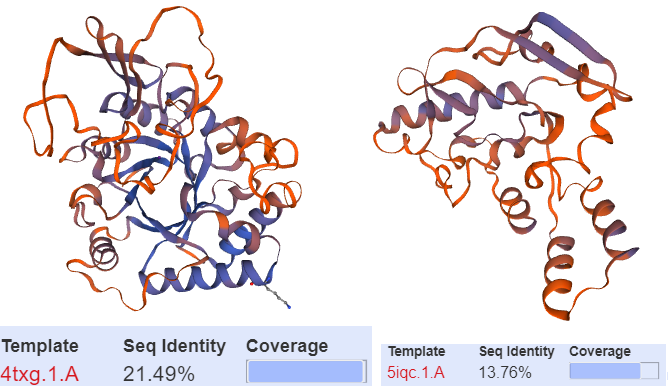

In [14]:
print(Images[0].strip('.png')+'\t'+'de'+'\t'+'P.lilacinum'+'\t\t'+ Images[0].strip('.png')+'\t'+'de'+'\t'+'M.acridum')
Image(filename=Images[0])

Quitinasa18-11	de	P.lilacinum		Quitinasa18-11	de	M.acridum


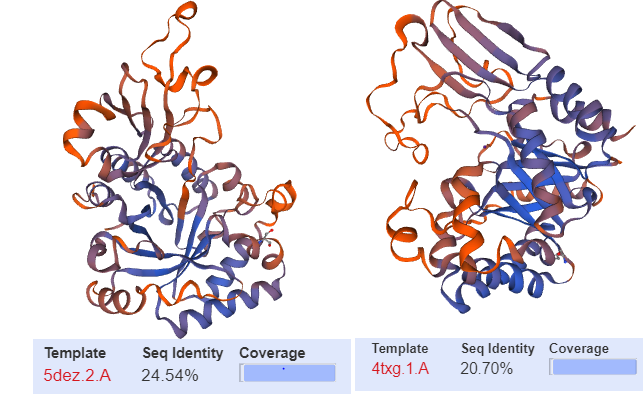

In [15]:
print(Images[1].strip('.png')+'\t'+'de'+'\t'+'P.lilacinum'+'\t\t'+ Images[1].strip('.png')+'\t'+'de'+'\t'+'M.acridum')
Image(filename=Images[1])

Endoquitinasa	de	P.lilacinum		Endoquitinasa	de	M.acridum


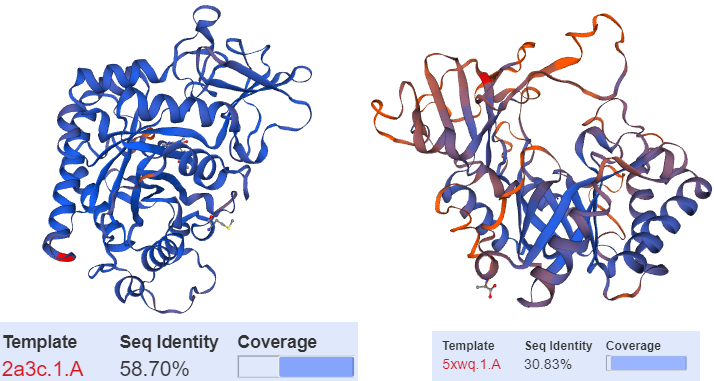

In [16]:
print(Images[2].strip('.png')+'\t'+'de'+'\t'+'P.lilacinum'+'\t\t'+ Images[2].strip('.png')+'\t'+'de'+'\t'+'M.acridum')
Image(filename=Images[2])

QuitinasaChiA	de	P.lilacinum		QuitinasaChiA	de	M.acridum


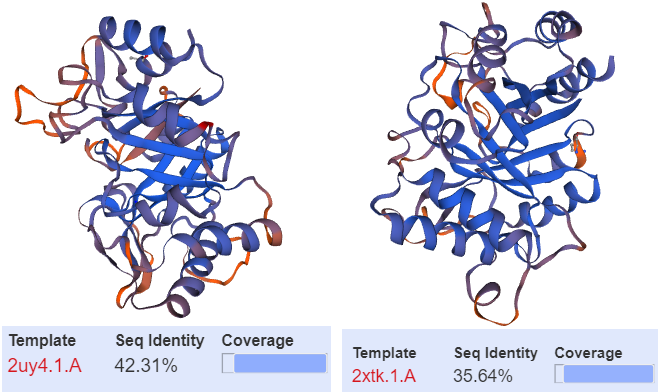

In [17]:
print(Images[3].strip('.png')+'\t'+'de'+'\t'+'P.lilacinum'+'\t\t'+ Images[3].strip('.png')+'\t'+'de'+'\t'+'M.acridum')
Image(filename=Images[3])

Quitinasa18-18	de	P.lilacinum		Quitinasa18-18	de	M.acridum


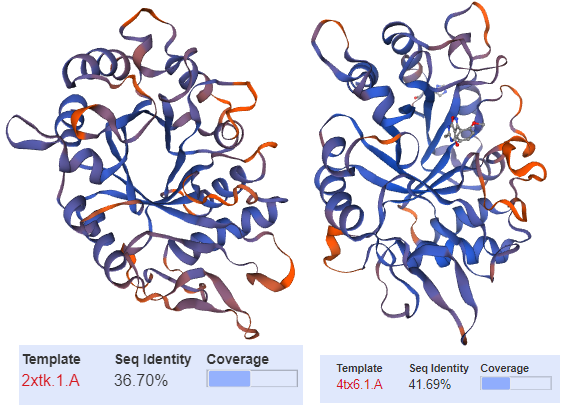

In [18]:
print(Images[4].strip('.png')+'\t'+'de'+'\t'+'P.lilacinum'+'\t\t'+ Images[4].strip('.png')+'\t'+'de'+'\t'+'M.acridum')
Image(filename=Images[4])

En la siguiente tabla, se puede observar el resumen de la naturaleza de los templates para cada predicción de los plegamientos:

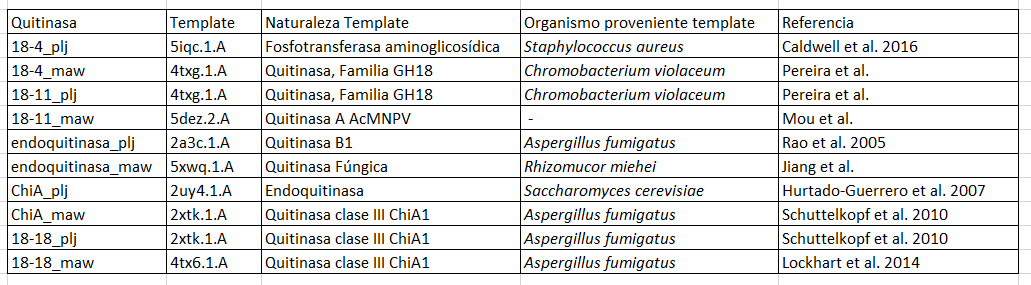

In [19]:
Image(filename='Tabla_templates.PNG')

# Discusión

Al observar la variedad de proteínas de tipo quitinasa en los dos biocontroladores, según la base de datos KEGG. A primera instancia es notable que hay una mayor cantidad de quitinasas para P.lilacinum en comparación con M. acridum, pero esto no necesariamente signifique que el primero presenta mayor diversidad proteica, debido a otras razones como la cantidad de proteínas secuenciadas. Sin embargo, en un estudio se evidenció como los genes relacionados con la degradación de la quitina en P. lilacinum han presentado una serie de expansiones con posibles repercusiones positivas frente a la infección de los diferentes instares en nemátodos (Gao et al. 2011). Adicionalmente, se ha visto la participación de los hongos en la transferencia horizontal de genes en varios sistemas y a su vez, como quitinasas de la familia GH19 pueden ser exitosamente transferidas (Prakash et al. 2010, Walton 2000). Por ende, al P.lilacinum presentar una mayor cantidad de hospedadores, esto podría estar influenciando la variedad de quitinasas producidas en el transcurso de la patogénesis. 

En el caso de la obtención de las secuencias aminoacídicas, a pesar de tratarse de las mismas  quitinasas, sus aminoácidos y longitudes polipeptídicas difieren, siendo más notable para el caso de las endoquitinasas, donde se aprecia como la proteína para P.lilacinum es considerablemente más extensa. Esto último podría estar implicado en los diferentes sustratos que puede tener esta proteína en un biocontrolador con mayor espectro, es decir, la cadena polipeptídica está íntimamente asociada al plegamiento posterior de la molécula y probablemente a la variedad de sustratos donde pueden actuar. Además, en otros estudios han evaluado el papel de varias endoquitinasas de biocontroladores, Trichoderma harzianum y Metarhizium anisopliae, como potenciales virulentos fúngicos y que, pese a no depender únicamente de la producción de estas enzimas, su inhibición puede conllevar a la disminución de la eficacia infectiva del hongo (Boldo et al. 2009, Woo et al. 1999).

Los mejores scores fueron para los alineamientos entre las quitinasas 18-11, 18-18 y las Clase III ChiA. Lo cual concuerda con lo observado, ya que las endoquitinasas presentaban las secuencias a simple vista más diferentes, y ahora con un score de 241 para BLOSUM62 y 158.5 para PAM60, lo corroboran. No obstante, el score más bajo fue para las quitinasas 18-4 con un score de -52.2 (BLOSUM62) y -78(PAM60) que puede indicar la alta presencia de gaps y mismatches en el alineamiento debido a la poca similaridad entre ambas secuencias. Estas quitinasas son fundamentales en la infección por el hongo atrapador de nemátodos Arthrobotrys oligospora y en algunos aislados de Paecilomyces lilacinum relacionan a estas quitinasas con el parasitismo (Yang et al. 2013, Park et al. 2004). Por ende, al ser quitinasas involucradas en la patogénesis, las diferencias significativas encontradas pueden deberse a las presiones selectivas que ocurren en sus ambientes, es decir, esas diferencias en las secuencias pueden o no tener un papel esencial a la hora de unirse al sustrato y comenzar con la degradación y la patogenia en el huésped (Prakash et al. 2010, Watson 2000, Yang et al. 2013). Por otro lado, las quitinasas 18-11, 18-18 y ChiA al presentar altos scores, esto puede indicar regiones conservadas en las secuencias y elucidar papeles importantes realizados por éstas; las cuales han sido comprobadas como principales efectores de la cascada de señalización de la patogénesis en varios biocontroladores y como esenciales para la entrada de otros compuestos enzimáticos al hospedador (Boldo et al. 2009, Molnar et al.2010, Park et al. 2004, Prakash et al. 2010). Es de resaltar que no hubo conflicto entre los resultados arrojados con las dos matrices de sustitución, es decir, sus scores para cada alineamiento evidenciaban el mismo patrón con respecto a la relación de las quitinasas en los biocontroladores.

Para comprobar sí las disimilaridades de las secuencias, observadas en sus cadenas y por los alineamientos, presentan implicaciones en las estructuras terciarias de las quitinasas se obtuvieron las predicciones de los plegamientos. Se puede observar que para todos los pares de proteínas de ambos biocontroladores, los modelamientos diferentes tanto en el porcentaje de identidad, la cobertura y la proteína cristalizada molde (template). Sin embargo, también había elementos que los modelos compartían, como la presencia de varias hélices alfa, laminas beta y loops (Mckee y Mckee 2003). Asimismo, esta variedad en el plegamiento para las quitinasas comunes puede estar relacionada con los nichos ecológicos del hongo, debido a que a medida que aumenten los hospedadores, probablemente los sustratos varíen y en eso va a repercutir la forma que la proteína se plegue para una mejor actuación de ésta frente al compuesto donde actúa (Mckee y Mckee 2003, Leger et al. 1997). 

Los moldes utilizados por SWISS-MODEL provenían, en general, de microorganismos oportunistas como Staphylococcus aureus y Aspergillus fumigatus, fermentadores como Saccharomyces cerevisae, y ambientales como Chromobacterium violaceum (Caldwell et al. 2016, Hurtado-Guerrero et al. 2007, Jiang et al., Pereira et al., Schuttelkopft et al. 2010) Lo cual es también importante porque fueron elegidos como moldes debido a sus similaridades estructurales y por ende, al presentar hábitos oportunistas, fermentadores y ambientales,están indicando los posibles nichos ecológicos donde se encuentran.  Por ejemplo, el oportunismo es un proceso que requiere de una gran versatilidad del microorganismo para sopesar la heterogeneidad del ambiente y aprovecharse de eso y por lo cual, necesita de unos procesos moleculares y enzimas igualmente dinámicos (Lyczak et al. 2000). Por ende, es interesante recalcar que los templates de las quitinasas de P. lilacinum eran principalmente de microorganismos oportunistas y/o patógenos, a diferencia de M. acridum que, en su mayoría, fueron ambientales, Rhizomucor miehei y C. violaceum. Lo anterior puede estar relacionado con la selección del ambiente, el huésped, hacia los biocontroladores, donde P.lilacinum pueda presentar un mayor arsenal de proteínas de tipo quitinasas debido a que se enfrenta a variaciones estructurales en las barreras físicas de los  hospedadores que parasita (Leger et al. 1997). 

En conclusión, este fue un trabajo exploratorio para evidenciar preliminarmente, sí las proteínas quitinasas comunes entre dos biocontroladores, P.lilacinum y M. acridum, presentaban diferencias estructurales posiblemente adjudicables a su ampliación del nicho ecológico. En general se pudo observar que hay diferencias marcadas entre varias de las quitinasas evaluadas tanto a nivel de secuencia como en el plegamiento. Además, la posible presencia de regiones conservadas en quitinasas como la 18-11, 18-18 y ChiA. De igual manera, la homología de las quitinasas con proteínas de microorganismos con otros nichos ecológicos. No obstante, debe hacerse un estudio mucho más riguroso para comprobar si debido a los cambios estructurales y moleculares de estas proteínas, se confiere la capacidad de tener varios nichos ecológicos, donde se tenga en cuenta lo obtenido en este trabajo y a su vez, la historia evolutiva de cada quitinasa con el fin de ver las razones puntuales por las cuales se han generado esos cambios asociados a la patogenicidad de los biocontroladores. 

# Bibliografía

1. http://nbviewer.jupyter.org/github/widdowquinn/notebooks/blob/master/Biopython_KGML_intro.ipynb
2. Cock, P. J., Antao, T., Chang, J. T., Chapman, B. A., Cox, C. J., Dalke, A., ... & De Hoon, M. J. (2009). Biopython: freely available Python tools for computational molecular biology and bioinformatics. Bioinformatics, 25(11), 1422-1423.
3. https://www.genome.jp/kegg/catalog/org_list.html
4. https://www.genome.jp/kegg/annotation/enzyme.html
5. https://www.bioinformatics.org/wiki/Scoring_matrix
6. Waterhouse, A., Bertoni, M., Bienert, S., Studer, G., Tauriello, G., Gumienny, R., Heer, F.T., de Beer, T.A.P., Rempfer, C., Bordoli, L., Lepore, R., Schwede, T. SWISS-MODEL: homology modelling of protein structures and complexes. Nucleic Acids Res. 46(W1), W296-W303 (2018)
7. Kanehisa, M., & Goto, S. (2000). KEGG: kyoto encyclopedia of genes and genomes. Nucleic acids research, 28(1), 27-30.
8. Waterhouse, A., Bertoni, M., Bienert, S., Studer, G., Tauriello, G., Gumienny, R., Heer, F.T., de Beer, T.A.P., Rempfer, C., Bordoli, L., Lepore, R., Schwede, T. SWISS-MODEL: homology modelling of protein structures and complexes. Nucleic Acids Res. 46(W1), W296-W303 (2018)
9. Travisi, C. M. & Nijkamp, P. (2008). Valuing environmental and health risk in agriculture: A choice experiment approach to pesticides in Italy. Ecological Economics, 67, 598-607
10. Arango, W. M. , Salazar D.F.(2011). Tendencias verdes en la agricultura para el manejo y control de plagas. Revista Tumbaga, 1(6).
11. Nicholls, C. I. (2008). Control biológico de insectos: un enfoque agroecológico. Universidad de Antioquia.
12. Araújo, J. P., & Hughes, D. P. (2016). Diversity of entomopathogenic fungi: which groups conquered the insect body?. In Advances in genetics (Vol. 94, pp. 1-39). Academic Press.
13. Bolar, J. P., Norelli, J. L., Harman, G. E., Brown, S. K., & Aldwinckle, H. S. (2001). Synergistic activity of endochitinase and exochitinase from Trichoderma atroviride (T. harzianum) against the pathogenic fungus (Venturia inaequalis) in transgenic apple plants. Transgenic Research, 10(6), 533-543.
14. Eisenhauer, N., Schulz, W., Scheu, S., & Jousset, A. (2013). Niche dimensionality links biodiversity and invasibility of microbial communities. Functional Ecology, 27(1), 282-288.
15. Gao, Q., Jin, K., Ying, S. H., Zhang, Y., Xiao, G., Shang, Y., ... & Peng, G. (2011). Genome sequencing and comparative transcriptomics of the model entomopathogenic fungi Metarhizium anisopliae and M. acridum. PLoS genetics, 7(1), e1001264.
16. Hartl, L., Zach, S., & Seidl-Seiboth, V. (2012). Fungal chitinases: diversity, mechanistic properties and biotechnological potential. Applied microbiology and biotechnology, 93(2), 533-543.
17. Cory J.S., Ericsson J.D. (2009) Fungal entomopathogens in a tritrophic context. In: Roy H.E., Vega F.E., Chandler D., Goettel M.S., Pell J., Wajnberg E. (eds) The Ecology of Fungal Entomopathogens. Springer, Dordrecht
18. Janisiewicz, W. (1996). Ecological diversity, niche overlap, and coexistence of antagonists used in developing mixtures for biocontrol of postharvest diseases of apples. Phytopathology, 86(5), 473-479.
19. Li J, Yu L, Yang J, Dong L, Tian B, Yu Z, et al. New insights into the evolution of subtilisin-like serine protease genes in Pezizomycotina. BMC Evol Biol. 2010;10:68
20. Luangsa-ard, J., Houbraken, J., van Doorn, T., Hong, S. B., Borman, A. M., Hywel-Jones, N. L., & Samson, R. A. (2011). Purpureocillium, a new genus for the medically important Paecilomyces lilacinus. FEMS microbiology letters, 321(2), 141-149.
21. Mantilla, J. G., Galeano, N. F., Gaitan, A. L., Cristancho, M. A., Keyhani, N. O., & Gongora, C. E. (2012). Transcriptome analysis of the entomopathogenic fungus Beauveria bassiana grown on cuticular extracts of the coffee berry borer (Hypothenemus hampei). Microbiology, 158(7), 1826-1842.
22. Petrelli, G., Figa-Talamanca, I., Lauria, L., & Mantovani, A. (2003). Spontaneous abortion in spouses of greenhouse workers exposed to pesticides. Environmental health and pre- ventive medicine, 8, 77-81.
23. Prasad, P., Varshney, D., & Adholeya, A. (2015). Whole genome annotation and comparative genomic analyses of bio-control fungus Purpureocillium lilacinum. BMC genomics, 16(1), 1004.
24. Sanchez-Gutierrez YJ. 2017. Evaluación del bioformulado de Purpureocillium sp. (UdeA0106) sobre nematodos fitopatógenos en crisantemo (Dendranthema grandiflora) y acercamiento al estudio de sus mecanismos de patogenicidad.Tesis de grado como requisito parcial para obtener el título de Magister en Biología. Instituto de Biología, Universidad de Antioquia.86 p
25. Tarasco, E., Santiago Alvarez, C., Triggiani, O., & Quesada Moraga, E. (2011). Laboratory studies on the competition for insect haemocoel between Beauveria bassiana and Steinernema ichnusae recovered in the same ecological niche. Biocontrol science and technology, 21(6), 693-704.
26.  Wang, J. B., Leger, R. S., & Wang, C. (2016). Advances in genomics of entomopathogenic fungi. In Advances in genetics(Vol. 94, pp. 67-105). Academic Press.
27. Xiao G, Ying SH, Zheng P, Wang ZL, Zhang S, Xie XQ, et al. Genomic perspectives on the evolution of fungal entomopathogenicity in Beauveria bassiana. Sci Rep. 2012;2:483.
28. Xie, J., Li, S., Mo, C., Xiao, X., Peng, D., Wang, G., & Xiao, Y. (2016). Genome and transcriptome sequences reveal the specific parasitism of the nematophagous Purpureocillium lilacinum 36-1. Frontiers in microbiology, 7, 1084
29. Boldo, J. T., Junges, A., Do Amaral, K. B., Staats, C. C., Vainstein, M. H., & Schrank, A. (2009). Endochitinase CHI2 of the biocontrol fungus Metarhizium anisopliae affects its virulence toward the cotton stainer bug Dysdercus peruvianus. Current Genetics, 55(5), 551-560.
30. Caldwell, S.J. et al., Antibiotic Binding Drives Catalytic Activation of Aminoglycoside Kinase APH(2)-Ia. Structure (2016)
31. Jiang, Z.Q. et al., Crystal structure of chitinase (RmChi1) from Rhizomucor miehei (sp p32 2 1, native). To Be Published
32. Lyczak, J. B., Cannon, C. L., & Pier, G. B. (2000). Establishment of Pseudomonas aeruginosa infection: lessons from a versatile opportunist. Microbes and infection, 2(9), 1051-1060.
33. McKee, T., & McKee, J. R. (2003). Biochemistry: the molecular basis of life (Vol. 108). New York: McGraw-Hill.
34. Molnar, I., Gibson, D. M., & Krasnoff, S. B. (2010). Secondary metabolites from entomopathogenic Hypocrealean fungi. Natural product reports, 27(9), 1241-1275.
35. Mou, T.-C. et al., Crystal structure of AcMNPV Chitinase A. To Be Published
36. Park, J. O., Hargreaves, J. R., McConville, E. J., Stirling, G. R., Ghisalberti, E. L., & Sivasithamparam, K. (2004). Production of leucinostatins and nematicidal activity of Australian isolates of Paecilomyces lilacinus (Thom) Samson. Letters in Applied Microbiology, 38(4), 271-276.
37. Prakash, N. U., Jayanthi, M., Sabarinathan, R., Kangueane, P., Mathew, L., & Sekar, K. (2010). Evolution, homology conservation, and identification of unique sequence signatures in GH19 family chitinases. Journal of molecular evolution, 70(5), 466-478.
38.  Schuttelkopf, A.W. et al., Acetazolamide-Based Fungal Chitinase Inhibitors. Bioorg.Med.Chem. (2010).
39. St Leger, R. J., Joshi, L., & Roberts, D. W. (1997). Adaptation of proteases and carbohydrases of saprophytic, phytopathogenic and entomopathogenic fungi to the requirements of their ecological niches. Microbiology, 143(6), 1983-1992.
40. Walton, J. D. (2000). Horizontal gene transfer and the evolution of secondary metabolite gene clusters in fungi: an hypothesis. Fungal genetics and biology, 30(3), 167-171.
41. Woo, S. L., Donzelli, B., Scala, F., Mach, R., Harman, G. E., Kubicek, C. P., ... & Lorito, M. (1999). Disruption of the ech42 (endochitinase-encoding) gene affects biocontrol activity in Trichoderma harzianum P1. Molecular Plant-Microbe Interactions, 12(5), 419-429.
42. Yang, J., Yu, Y., Li, J., Zhu, W., Geng, Z., Jiang, D., ... & Zhang, K. Q. (2013). Characterization and functional analyses of the chitinase-encoding genes in the nematode-trapping fungus Arthrobotrys oligospora. Archives of microbiology, 195(7), 453-462.
43. Pereira, H.M. et al., Crystal Structure of a Family GH18 Chitinase from Chromobacterium violaceum. To Be Published